In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split 
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
df = pd.read_csv(r'C:\Users\Admin\resources\Case_study_CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [3]:
#Bộ dữ liệu chứa 206 dòng dữ liệu và 26 cột, các thuộc tính đều đủ không bị khuyết thiếu
#CarName, fuel type, aspiration, carbody, drivevwheel,enginelocation, enginetype,fuelsystem: là thuộc tính định tính, có thang đo định danh
#carid mặc dù có kiểu số (int64), nhưng các con số này chỉ có ý nghĩa phân biệt xe này với xe khác –> thuộc tính định danh
#symboling mặc dù có kiểu số (int64) nhưng những con số này không mang ý nghĩa mà các bậc an toàn đã mã hóa ra nó mang ý nghĩa -> thuộc tính thang đo thứ bậc (ordinal)
#doornumber, cylindernumber, wheelbase,carlength, carwidth, carheight,curweight, engineersize, boreration,stroke, compressionratio, horsepower, peakrpm,citympg, highwaympg, price: thuộc tính định lượng, thang đo ratio 

In [4]:
#Tìm mối liên hệ giữa hãng xe và tên xe, phát hiện và sửa sai dữ liệu
brand=[]
for i in df['CarName']:
    i=i.lower()
    a=i.split()
    brand.append(a[0])
df.insert(2, "brand", brand, allow_duplicates=False)

In [5]:
df=df.replace({'brand':{'maxda':'mazda','porcshce':'porsche','toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'}})

In [6]:
#Xem xét kiểu dữ liệu của các thuộc tính, thực hiện chuyển đổi về đúng kiểu
df1=df
df1=df1.replace({'doornumber':{'two':2,'four':4}})
df1=df1.replace({'cylindernumber':{'four':4,'six':6,'five':5,'three':3,'twelve':12,'two':2,'eight':8}})

In [7]:
#tiến hành phân tích mối liên hệ của từng thuộc tính với price bằng các biểu đồ mô tả tần số, tần suất, các phép kiểm định
#tương quan định lượng
dinh_luong = ['doornumber','cylindernumber','wheelbase','carlength', 'carwidth', 'carheight','curbweight', 'enginesize', 'boreratio','stroke', 'compressionratio', 'horsepower', 'peakrpm','citympg', 'highwaympg']
for i in dinh_luong:
    r, pvalue = stats.pearsonr(df1[i], df1['price'])
    if pvalue < 0.05:
        print(f'Thuộc tính {i} và price có tương quan với giá trị r = {r}, giá trị pvalue = {pvalue}')

Thuộc tính cylindernumber và price có tương quan với giá trị r = 0.7183049020002839, giá trị pvalue = 8.028863372443577e-34
Thuộc tính wheelbase và price có tương quan với giá trị r = 0.5778155982921502, giá trị pvalue = 1.1828204863377837e-19
Thuộc tính carlength và price có tương quan với giá trị r = 0.6829200156779621, giá trị pvalue = 1.678706624074708e-29
Thuộc tính carwidth và price có tương quan với giá trị r = 0.7593252997415116, giá trị pvalue = 9.627437876119569e-40
Thuộc tính curbweight và price có tương quan với giá trị r = 0.8353048793372966, giá trị pvalue = 1.2144448264032206e-54
Thuộc tính enginesize và price có tương quan với giá trị r = 0.8741448025245118, giá trị pvalue = 1.3547637598647268e-65
Thuộc tính boreratio và price có tương quan với giá trị r = 0.5531732367984432, giá trị pvalue = 7.907922278250096e-18
Thuộc tính horsepower và price có tương quan với giá trị r = 0.8081388225362219, giá trị pvalue = 1.4834365732938807e-48
Thuộc tính citympg và price có tương 

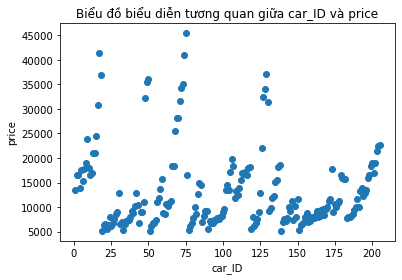

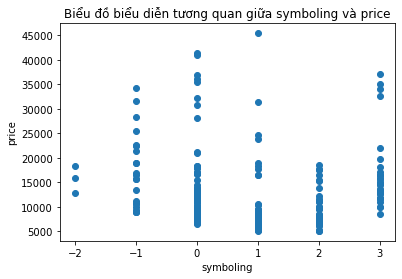

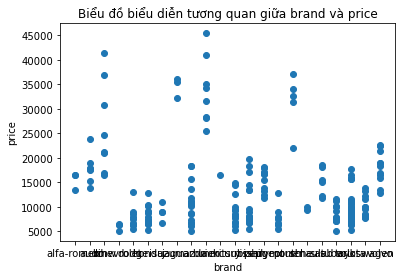

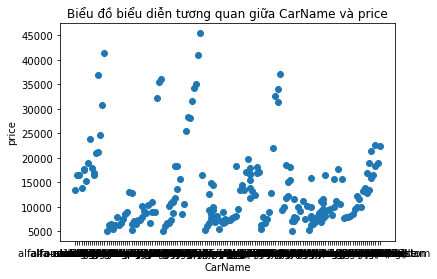

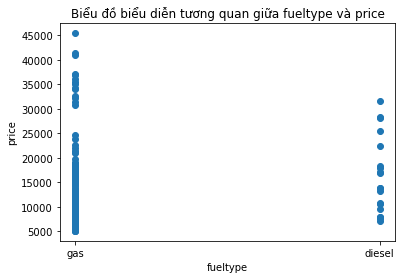

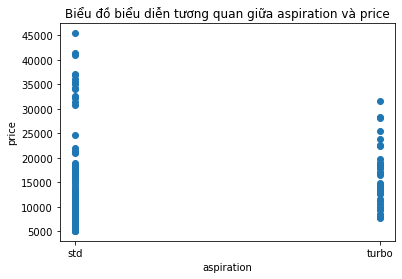

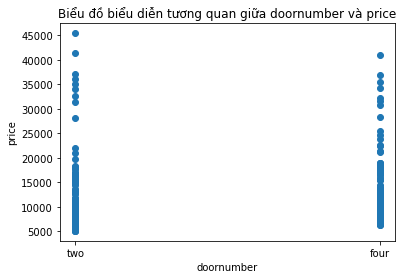

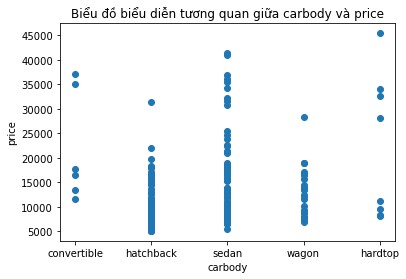

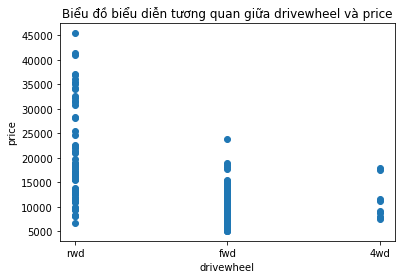

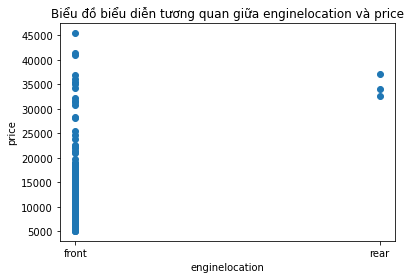

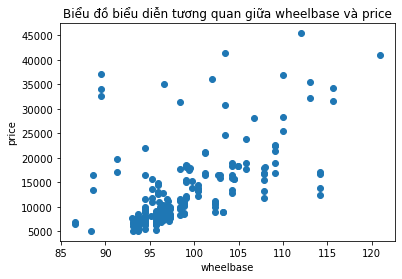

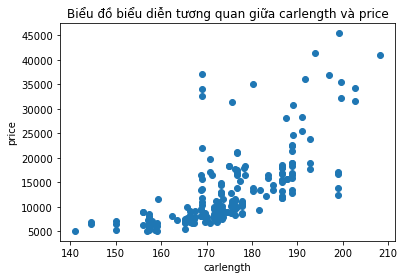

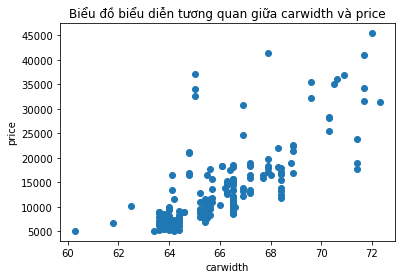

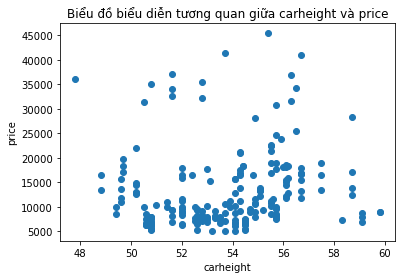

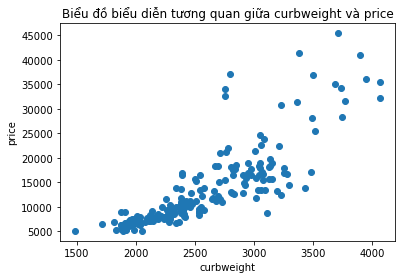

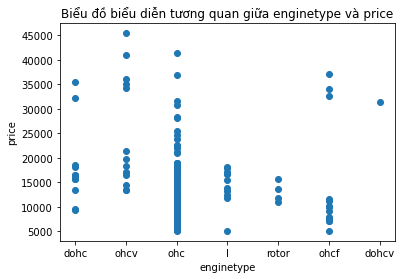

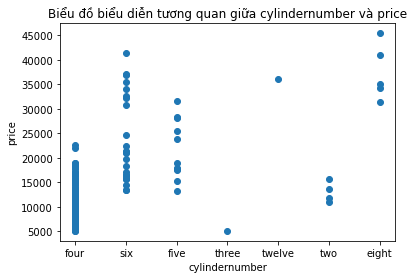

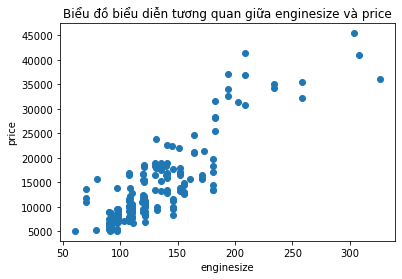

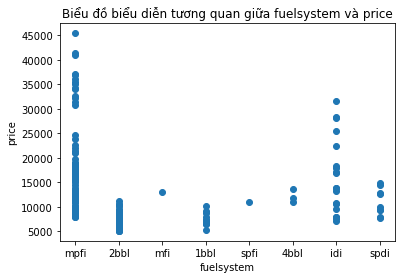

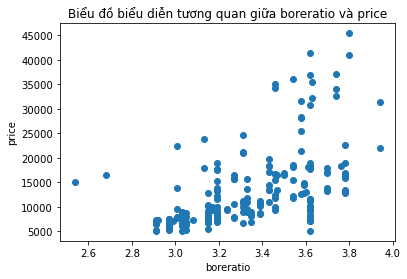

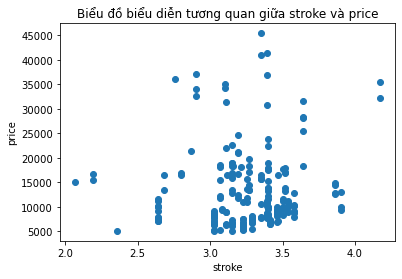

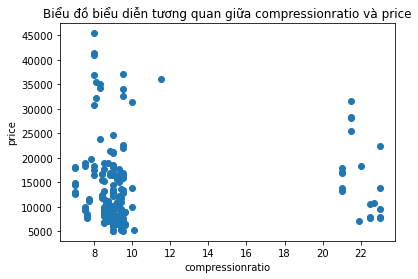

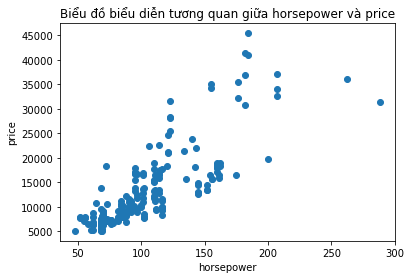

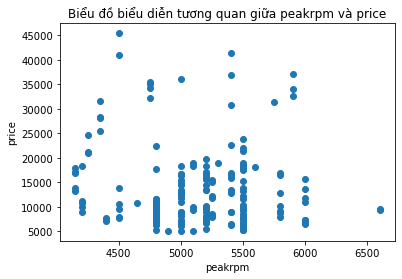

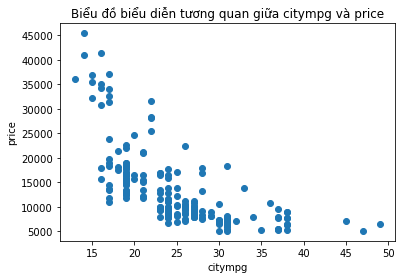

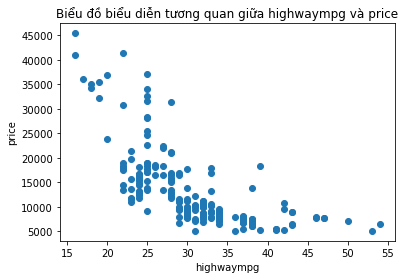

In [8]:
#Biểu đồ tương quan
for i in df.columns:
    if i =='price': 
        break
    plt.scatter(df[i],df['price'])
    plt.title(f'Biểu đồ biểu diễn tương quan giữa {i} và price')
    plt.xlabel(i)
    plt.ylabel('price')
    plt.show()

In [9]:
#Nhận xét các thuộc tính gây ảnh hưởng tới giá
#Các thuộc tính như cylindernumber, carlength, carwidth, curbweight, enginesize,  horsepower với thuộc tính price có tương quan tuyến tính mạnh, và là tương quan thuận
#Các thuộc tính như wheelbase, boreratio với thuộc tính price có tương quan tuyến tính trung bình, và là tương quan thuận
#Các thuộc tính như citympg, highwaytmpg với thuộc tính price có tương quan tuyến tính mạnh, và là tương quan nghịch

In [10]:
#Vẽ biểu đồ heatmap biểu diễn mức độ tương quan giữa các biến định lượng (xem xét có những biến nào có tương quan lớn với nhau, chỉ giữa lại 1 trong các biến đó đưa vào mô hình)
#Correlation tổng
df1.iloc[:,1:].corr()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.664073,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.113129,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
doornumber,-0.664073,1.000000,0.447357,0.398568,0.207168,0.552208,0.197379,-0.016009,0.020742,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
wheelbase,-0.531954,0.447357,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.398568,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.207168,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.552208,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.197379,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
cylindernumber,-0.113129,-0.016009,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.231399,0.008210,-0.020002,0.692016,-0.124172,-0.445837,-0.466666,0.718305
enginesize,-0.105790,0.020742,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.119258,0.488750,0.606454,0.559150,0.171071,0.648480,0.231399,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173


In [11]:
#Correlation của price
df1.iloc[:,1:].corr().price.to_frame()

,price
symboling,-0.079978
doornumber,0.031835
wheelbase,0.577816
carlength,0.682920
carwidth,0.759325
carheight,0.119336
curbweight,0.835305
cylindernumber,0.718305
enginesize,0.874145
boreratio,0.553173


<AxesSubplot:>

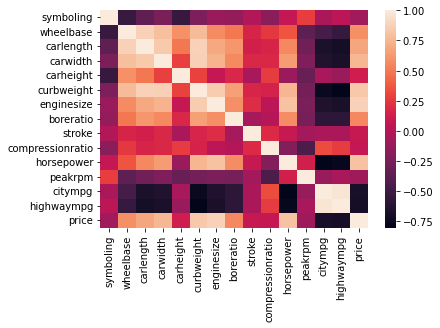

In [12]:
sns.heatmap(df.iloc[:,1:].select_dtypes(['int','float']).corr())

In [13]:
#Tiến hành mã hóa tạo ra các biến dumy từ các biến category (thang đo nominal) ban đầu
#Mã hóa
df2=df1.drop(['car_ID','CarName'],axis=1)
df3=pd.get_dummies(df2)

In [14]:
df3.shape

(205, 68)

In [15]:
#Correlation của price
df_price=df3.iloc[:,1:].corr().price.to_frame()
df_price

,price
doornumber,0.031835
wheelbase,0.577816
carlength,0.682920
carwidth,0.759325
carheight,0.119336
...,...
fuelsystem_idi,0.105679
fuelsystem_mfi,-0.002747
fuelsystem_mpfi,0.517075
fuelsystem_spdi,-0.061475


In [16]:
type(df_price.iloc[1,0])

numpy.float64

In [23]:
abs(-1)

1

In [31]:
cate=[]
for i in range(0,67,1):
    if abs(df_price.iloc[i,0]) > 0.3:
        if df_price.index[i] != 'price':
            cate.append(df_price.index[i])
cate

['wheelbase',
 'carlength',
 'carwidth',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'horsepower',
 'citympg',
 'highwaympg',
 'brand_bmw',
 'brand_buick',
 'brand_jaguar',
 'brand_porsche',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'enginelocation_front',
 'enginelocation_rear',
 'enginetype_ohc',
 'enginetype_ohcv',
 'fuelsystem_2bbl',
 'fuelsystem_mpfi']

In [42]:
df4=df3.loc[:,cate].corr()
df4

,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,...,brand_jaguar,brand_porsche,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_ohc,enginetype_ohcv,fuelsystem_2bbl,fuelsystem_mpfi
wheelbase,1.000000,0.874587,0.795144,0.776386,0.339507,0.569329,0.488750,0.353294,-0.470414,-0.544082,...,0.214573,-0.170472,-0.460355,0.498830,0.187790,-0.187790,-0.204037,0.166152,-0.396505,0.348891
carlength,0.874587,1.000000,0.841118,0.877728,0.430672,0.683360,0.606454,0.552623,-0.670909,-0.704662,...,0.226930,-0.048682,-0.508714,0.538370,0.050989,-0.050989,-0.274413,0.244053,-0.487237,0.511374
carwidth,0.795144,0.841118,1.000000,0.867032,0.545007,0.735433,0.559150,0.640732,-0.642704,-0.677218,...,0.229246,0.089564,-0.472116,0.511149,0.051698,-0.051698,-0.286211,0.348869,-0.522594,0.461896
curbweight,0.776386,0.877728,0.867032,1.000000,0.609727,0.850594,0.648480,0.750739,-0.757414,-0.797465,...,0.345315,0.102171,-0.666039,0.669987,-0.050468,0.050468,-0.413293,0.400878,-0.577159,0.520220
cylindernumber,0.339507,0.430672,0.545007,0.609727,1.000000,0.846031,0.231399,0.692016,-0.445837,-0.466666,...,0.409100,0.237492,-0.327460,0.347350,-0.183048,0.183048,-0.316184,0.650738,-0.252848,0.392551
enginesize,0.569329,0.683360,0.735433,0.850594,0.846031,1.000000,0.583774,0.809769,-0.653658,-0.677470,...,0.451076,0.229487,-0.518391,0.565509,-0.196826,0.196826,-0.363334,0.562403,-0.442562,0.483520
boreratio,0.488750,0.606454,0.559150,0.648480,0.231399,0.583774,1.000000,0.573677,-0.584532,-0.587012,...,0.121894,0.286897,-0.583087,0.574105,-0.185042,0.185042,-0.410383,0.119509,-0.353342,0.419335
horsepower,0.353294,0.552623,0.640732,0.750739,0.692016,0.809769,0.573677,1.000000,-0.801456,-0.770544,...,0.310631,0.426003,-0.544438,0.575564,-0.317839,0.317839,-0.427616,0.431539,-0.541966,0.628372
citympg,-0.470414,-0.670909,-0.642704,-0.757414,-0.445837,-0.653658,-0.584532,-0.801456,1.000000,0.971337,...,-0.203284,-0.189449,0.563879,-0.545789,0.153487,-0.153487,0.391236,-0.336926,0.520751,-0.644489
highwaympg,-0.544082,-0.704662,-0.677218,-0.797465,-0.466666,-0.677470,-0.587012,-0.770544,0.971337,1.000000,...,-0.220292,-0.109356,0.600828,-0.566149,0.102026,-0.102026,0.426049,-0.360616,0.528009,-0.610813


In [54]:
cor=[]
for i in df4.index:
    for j in df4.columns:
        if i !=j:
            if df4.loc[i,j] > 0.6:
                cor.append([i,j])
len(cor)

46

<AxesSubplot:>

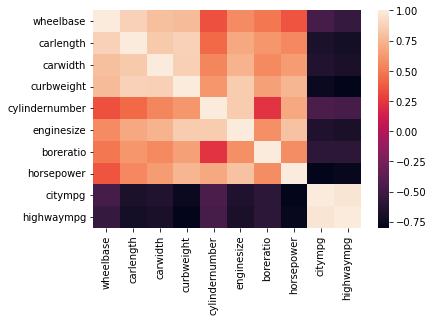

In [39]:
sns.heatmap(df3.loc[:,cate].select_dtypes(['int','float']).corr())

In [32]:
#Xây dựng mô hình hồi quy tuyến tính bằng thư viện sklearn, sử dụng thêm feature selection để chọn các thuộc tính tốt nhất.
#Mô hình với các biến có pvalue <0.05 trong tương quan
X = df3.loc[:,cate].values.reshape(-1,22)
y=df3.loc[:,'price'].ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
m_model = LinearRegression()
m_model.fit(X_train,y_train)

LinearRegression()

In [33]:
exog = sm.add_constant(X_train)
estimator = sm.OLS(y_train,exog).fit()
print(estimator.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     125.6
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           2.93e-80
Time:                        21:14:35   Log-Likelihood:                -1461.8
No. Observations:                 164   AIC:                             2966.
Df Residuals:                     143   BIC:                             3031.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -3.1e+04   5865.683     -5.285      0.0

In [34]:
#Đánh giá chất lượng  mô hình dựa trên các thông số như R_square, Tổng bình phương sai số trung bình.
y_pred = m_model.predict(X_test)
r2_train = r2_score(y_train, m_model.predict(X_train))
print("R2 trên tập huấn luyện của model là:" + str(r2_train))
r2_test = r2_score(y_test, y_pred)
print("R2 trên tập kiểm tra của model là:" + str(r2_test))
print("Đánh giá năng lực dự báo trung bình trên tập test")
print('Sai số dự báo trung bình:', metrics.mean_absolute_error(y_test, y_pred))  

R2 trên tập huấn luyện của model là:0.9461335068568356
R2 trên tập kiểm tra của model là:0.8693637272547755
Đánh giá năng lực dự báo trung bình trên tập test
Sai số dự báo trung bình: 2151.9519181178043


In [35]:
#Mô hình với 10 biến định lượng
X = df1.loc[:,['cylindernumber','wheelbase','carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio','horsepower', 'citympg', 'highwaympg']].values.reshape(-1,10)
y=df1.loc[:,'price'].ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
m_model = LinearRegression()
m_model.fit(X_train,y_train)

LinearRegression()

In [36]:
exog = sm.add_constant(X_train)
estimator = sm.OLS(y_train,exog).fit()
print(estimator.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     73.28
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           3.49e-53
Time:                        21:15:48   Log-Likelihood:                -1557.4
No. Observations:                 164   AIC:                             3137.
Df Residuals:                     153   BIC:                             3171.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.602e+04   1.62e+04     -3.468      0.0

In [37]:
#Đánh giá chất lượng  mô hình dựa trên các thông số như R_square, Tổng bình phương sai số trung bình.
y_pred = m_model.predict(X_test)
r2_train = r2_score(y_train, m_model.predict(X_train))
print("R2 trên tập huấn luyện của model là:" + str(r2_train))
r2_test = r2_score(y_test, y_pred)
print("R2 trên tập kiểm tra của model là:" + str(r2_test))
print("Đánh giá năng lực dự báo trung bình trên tập test")
print('Sai số dự báo trung bình:', metrics.mean_absolute_error(y_test, y_pred)) 

R2 trên tập huấn luyện của model là:0.8272744202106326
R2 trên tập kiểm tra của model là:0.791962617291961
Đánh giá năng lực dự báo trung bình trên tập test
Sai số dự báo trung bình: 2858.629017285715


In [50]:
#Mô hình với một số biến
X = df3.loc[:,['curbweight', 'highwaympg', 'enginelocation_rear', 'enginetype_ohcv', 'fuelsystem_mpfi','fuelsystem_2bbl','enginetype_ohc','brand_bmw','brand_buick','brand_jaguar']].values.reshape(-1,10)
y=df3.loc[:,'price'].ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
m_model = LinearRegression()
m_model.fit(X_train,y_train)

LinearRegression()

In [51]:
exog = sm.add_constant(X_train)
estimator = sm.OLS(y_train,exog).fit()
print(estimator.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     180.2
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           2.72e-79
Time:                        21:39:31   Log-Likelihood:                -1492.5
No. Observations:                 164   AIC:                             3007.
Df Residuals:                     153   BIC:                             3041.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5072.0679   2998.148     -1.692      0.0

In [52]:
#Đánh giá chất lượng  mô hình dựa trên các thông số như R_square, Tổng bình phương sai số trung bình.
y_pred = m_model.predict(X_test)
r2_train = r2_score(y_train, m_model.predict(X_train))
print("R2 trên tập huấn luyện của model là:" + str(r2_train))
r2_test = r2_score(y_test, y_pred)
print("R2 trên tập kiểm tra của model là:" + str(r2_test))
print("Đánh giá năng lực dự báo trung bình trên tập test")
print('Sai số dự báo trung bình:', metrics.mean_absolute_error(y_test, y_pred)) 

R2 trên tập huấn luyện của model là:0.9217199859508451
R2 trên tập kiểm tra của model là:0.7736137391180065
Đánh giá năng lực dự báo trung bình trên tập test
Sai số dự báo trung bình: 2625.701301787107
